## Estudo comparativo de treino para o yolov{8,9,10}
>requisitos para rodar o dataset

* token do dataset do roboflow

* conexao com o drive para conseguir salvar os resultados dos testes e pesos

## Benchmark da ultralytics entre as versões

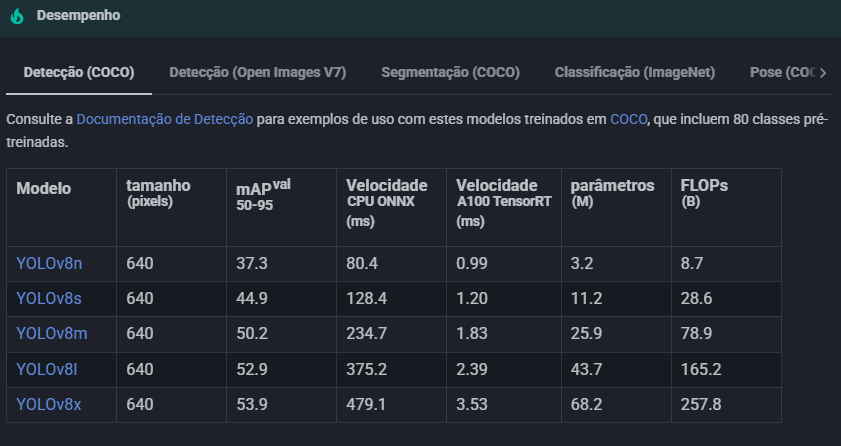

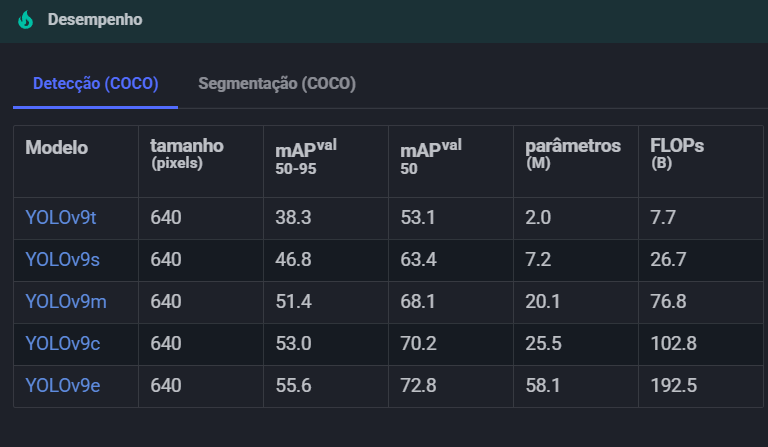


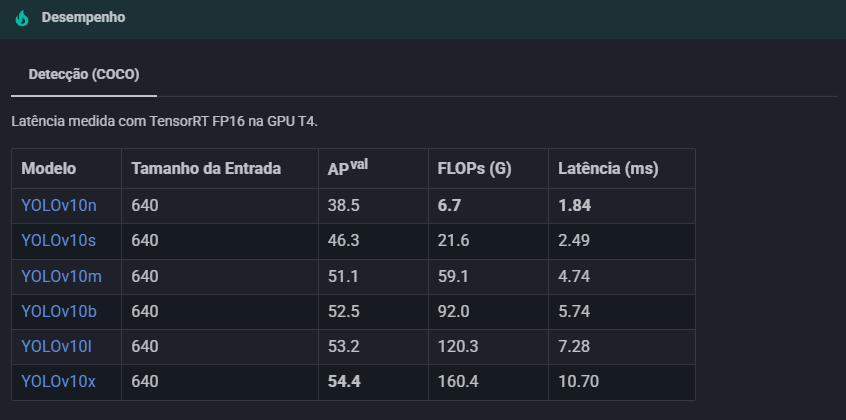
---



## Environment setup

In [1]:
#deps
!pip3 install -q torch torchvision --index-url https://download.pytorch.org/whl/cu126
!pip3 install -q roboflow supervision ultralytics opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 89.8 MB/s eta 0:00:00


In [2]:
ROBOFLOW_DATASET_VERSION=5

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()
from google.colab import userdata

ROBOFLOW_API_KEY = os.getenv("ROBOFLOW_API_KEY") or userdata.get('ROBOFLOW_API_KEY');

if(not ROBOFLOW_API_KEY):
    raise ValueError("ROBOFLOW_API_KEY não encontrada!!.")

In [4]:
#monta o volume do google drive para conseguir jogar a pasta de treino para dentro dele mais tarde
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Check GPU availability


In [5]:
!nvidia-smi

Tue Nov 11 17:24:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Download dataset from Roboflow Universe

In [7]:
from roboflow import download_dataset, Roboflow

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("ethos-ugyxt").project("ac2-visao-bfkss")
version = project.version(ROBOFLOW_DATASET_VERSION)
dataset = version.download("yolov9")#aqui é so para saber qual vai ser o formato do dataset, o v9 ja é compativel com os outros modelos mais novos



loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov9 in progress : 85.0%
Version export complete for yolov9 format



Extracting Dataset Version Zip to ac2-visao-5 in yolov9:: 100%|██████████| 11726/11726 [00:02<00:00, 5437.98it/s]


In [8]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [9]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [10]:
!cat {dataset.location}/data.yaml

names:
- arma
- bebida
- caixa inflamavel
- cigarro
- faca
nc: 5
roboflow:
  license: Public Domain
  project: ac2-visao-bfkss
  url: https://universe.roboflow.com/ethos-ugyxt/ac2-visao-bfkss/dataset/5
  version: 5
test: ../test/images
train: ../train/images
val: ../valid/images


In [11]:
#dowload args
!curl -O  https://raw.githubusercontent.com/Nathan-Rgs/computerVision-forbiddenObjects/dev/jupyter/arg.yml

!cat arg.yml

raise InterruptedError('Mude o args os args baixados antes de ir para o treinamento')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1442  100  1442    0     0   3725      0 --:--:-- --:--:-- --:--:--  3726
# Hiperparâmetros Revisados - Alinhados com a Monografia (Cap. 4.4)

# --- Parâmetros de Treinamento (da Monografia) ---
epochs: 2       # Monografia: 150
batch: 8         # Monografia: 32
imgsz: 640        # Monografia: 640x640
optimizer: AdamW    # Monografia: AdamW
lr0: 0.001        # Monografia: 0.001 (Taxa de aprendizado inicial para AdamW)
weight_decay: 0.0007  # Monografia: 0.0007
cos_lr: true        # Monografia: "agendamento por decaimento cosseno"
multi_scale: true   # Monografia: "treinamento multiescala"

# --- Parâmetros de Aquecimento (Warmup) ---
# (Baseado no seu arg.yml original, alinhado com "aquecimento curto" da monografia)
warmup_epochs: 3.0
warmup_momentum: 0.8
warmup_bias_lr: 0.1
lrf: 0.01 # Taxa de aprendizado final (lr0 * lrf) -

InterruptedError: Mude o args os args baixados antes de ir para o treinamento

## Fine-tune YOLO models


In [13]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [14]:

model_v9 = YOLO('yolov9m.pt')

project="Benchmark_Visao"
name="Run_YOLOv9"

results_v9 = model_v9.train(
    data=f'{dataset.location}/data.yaml',
    cfg="arg.yml",
    project=project,
    name=name
)

Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=8.5, cache=False, cfg=arg.yml, classes=None, close_mosaic=10, cls=0.7, compile=False, conf=0.25, copy_paste=0.1, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/ac2-visao-5/data.yaml, degrees=15.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=2, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.02, hsv_s=0.8, hsv_v=0.5, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.15, mode=train, model=yolov9m.pt, momentum=0.937, mosaic=0.0, multi_scale=True, name=Run_YOLOv9, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, plots=Tru

In [15]:

model_v8 = YOLO('yolov8m.pt')

project="Benchmark_Visao"
name="Run_YOLOv8"

results_v8 = model_v8.train(
    data=f'{dataset.location}/data.yaml',
    cfg="arg.yml",
    project=project,
    name=name
)

Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=8.5, cache=False, cfg=arg.yml, classes=None, close_mosaic=10, cls=0.7, compile=False, conf=0.25, copy_paste=0.1, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/ac2-visao-5/data.yaml, degrees=15.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=2, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.02, hsv_s=0.8, hsv_v=0.5, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.15, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=0.0, multi_scale=True, name=Run_YOLOv8, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, plots=Tru

In [16]:

model_v10 = YOLO('yolov10m.pt')

project="Benchmark_Visao"
name="Run_YOLOv10"

results_v10 = model_v10.train(
    data=f'{dataset.location}/data.yaml',
    cfg="arg.yml",
    project=project,
    name=name
)

Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=8.5, cache=False, cfg=arg.yml, classes=None, close_mosaic=10, cls=0.7, compile=False, conf=0.25, copy_paste=0.1, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/ac2-visao-5/data.yaml, degrees=15.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=2, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.02, hsv_s=0.8, hsv_v=0.5, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.15, mode=train, model=yolov10m.pt, momentum=0.937, mosaic=0.0, multi_scale=True, name=Run_YOLOv10, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, plots=T

In [17]:
# Define the source directory (where the training results are saved)
SOURCE_DIR=f"/content/{project}"

# Define the destination directory on Google Drive
DEST_DIR=f"/content/drive/MyDrive/Benchmark_Visao_Results"

# Create the destination directory on Google Drive if it doesn't exist
!mkdir -p "$DEST_DIR"

# Copy the contents of the source directory to the destination directory
!cp -r "$SOURCE_DIR" "$DEST_DIR"
!cp arg.yml "$DEST_DIR"
!echo "Training results copied to Google Drive: $DEST_DIR"

Training results copied to Google Drive: /content/drive/MyDrive/Benchmark_Visao_Results


## Evaluate fine-tuned

In [18]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

# List the directories created by the training runs
!ls /content/Benchmark_Visao/

Run_YOLOv10  Run_YOLOv8  Run_YOLOv9


## Evaluate fine-tuned models

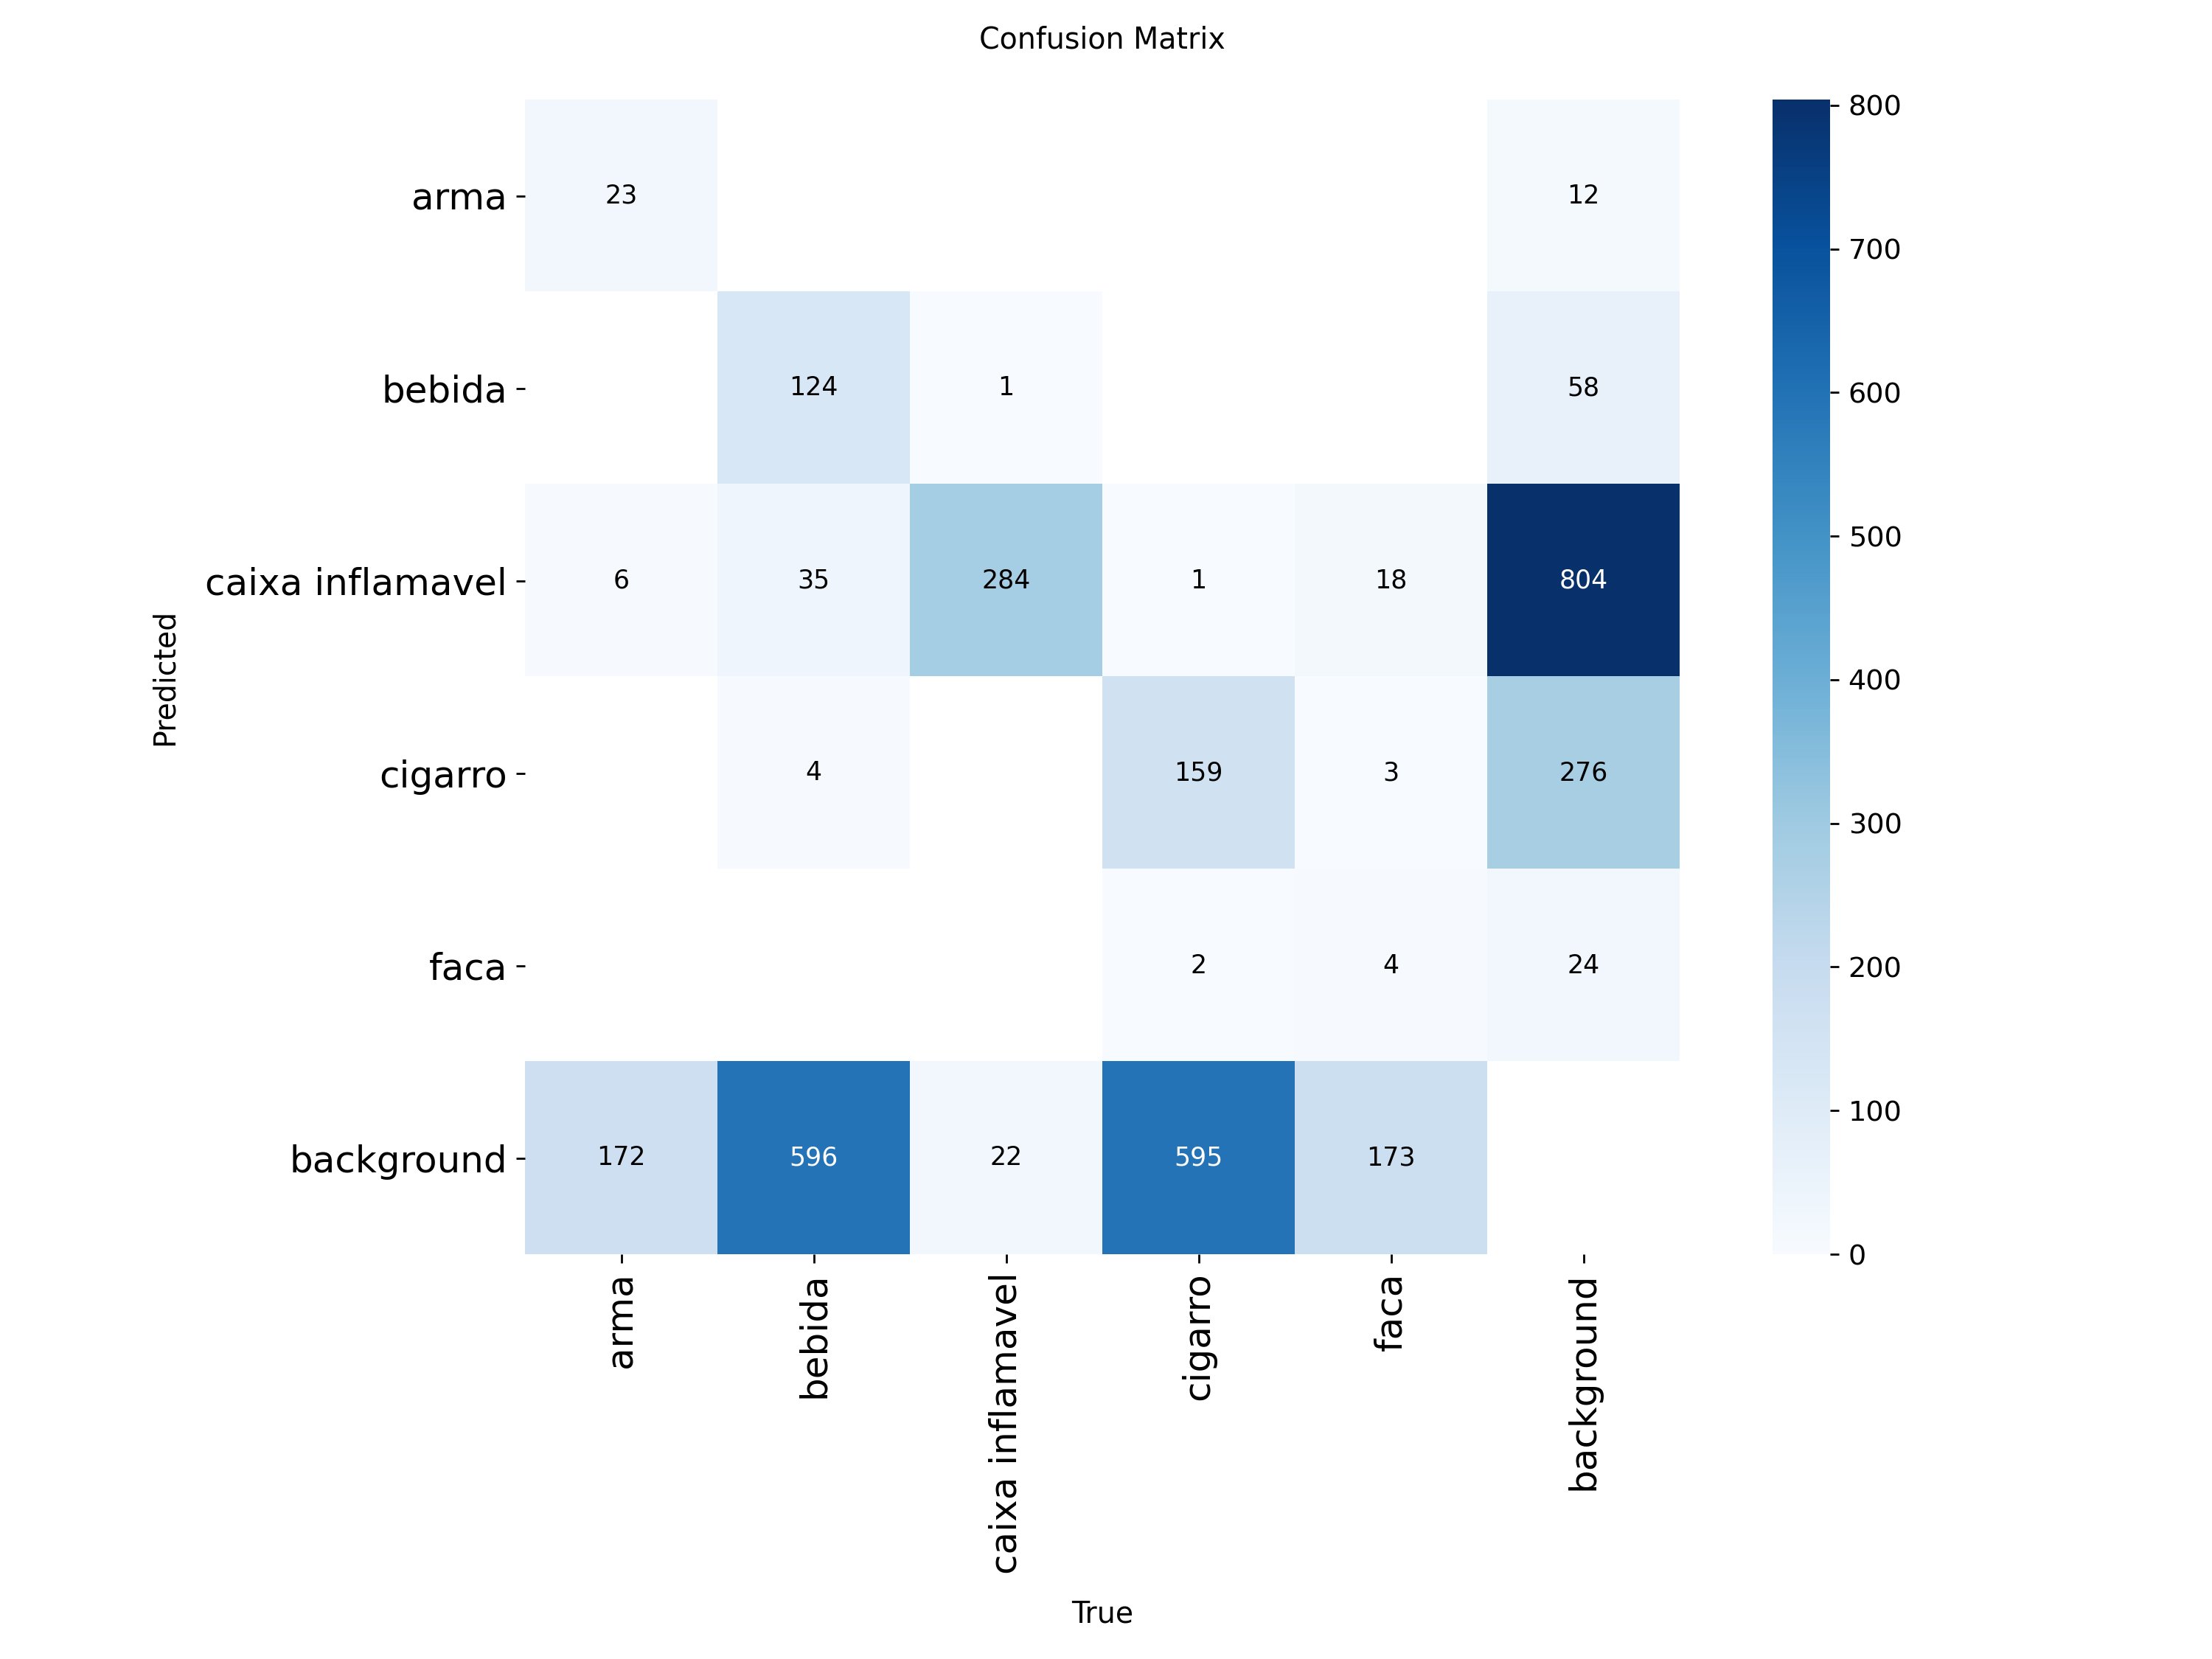

In [23]:
from IPython.display import Image

# Display confusion matrix for YOLOv9 (as an example, you can change this)
Image(filename=f'/content/Benchmark_Visao/Run_YOLOv8/confusion_matrix.png', width=1000)

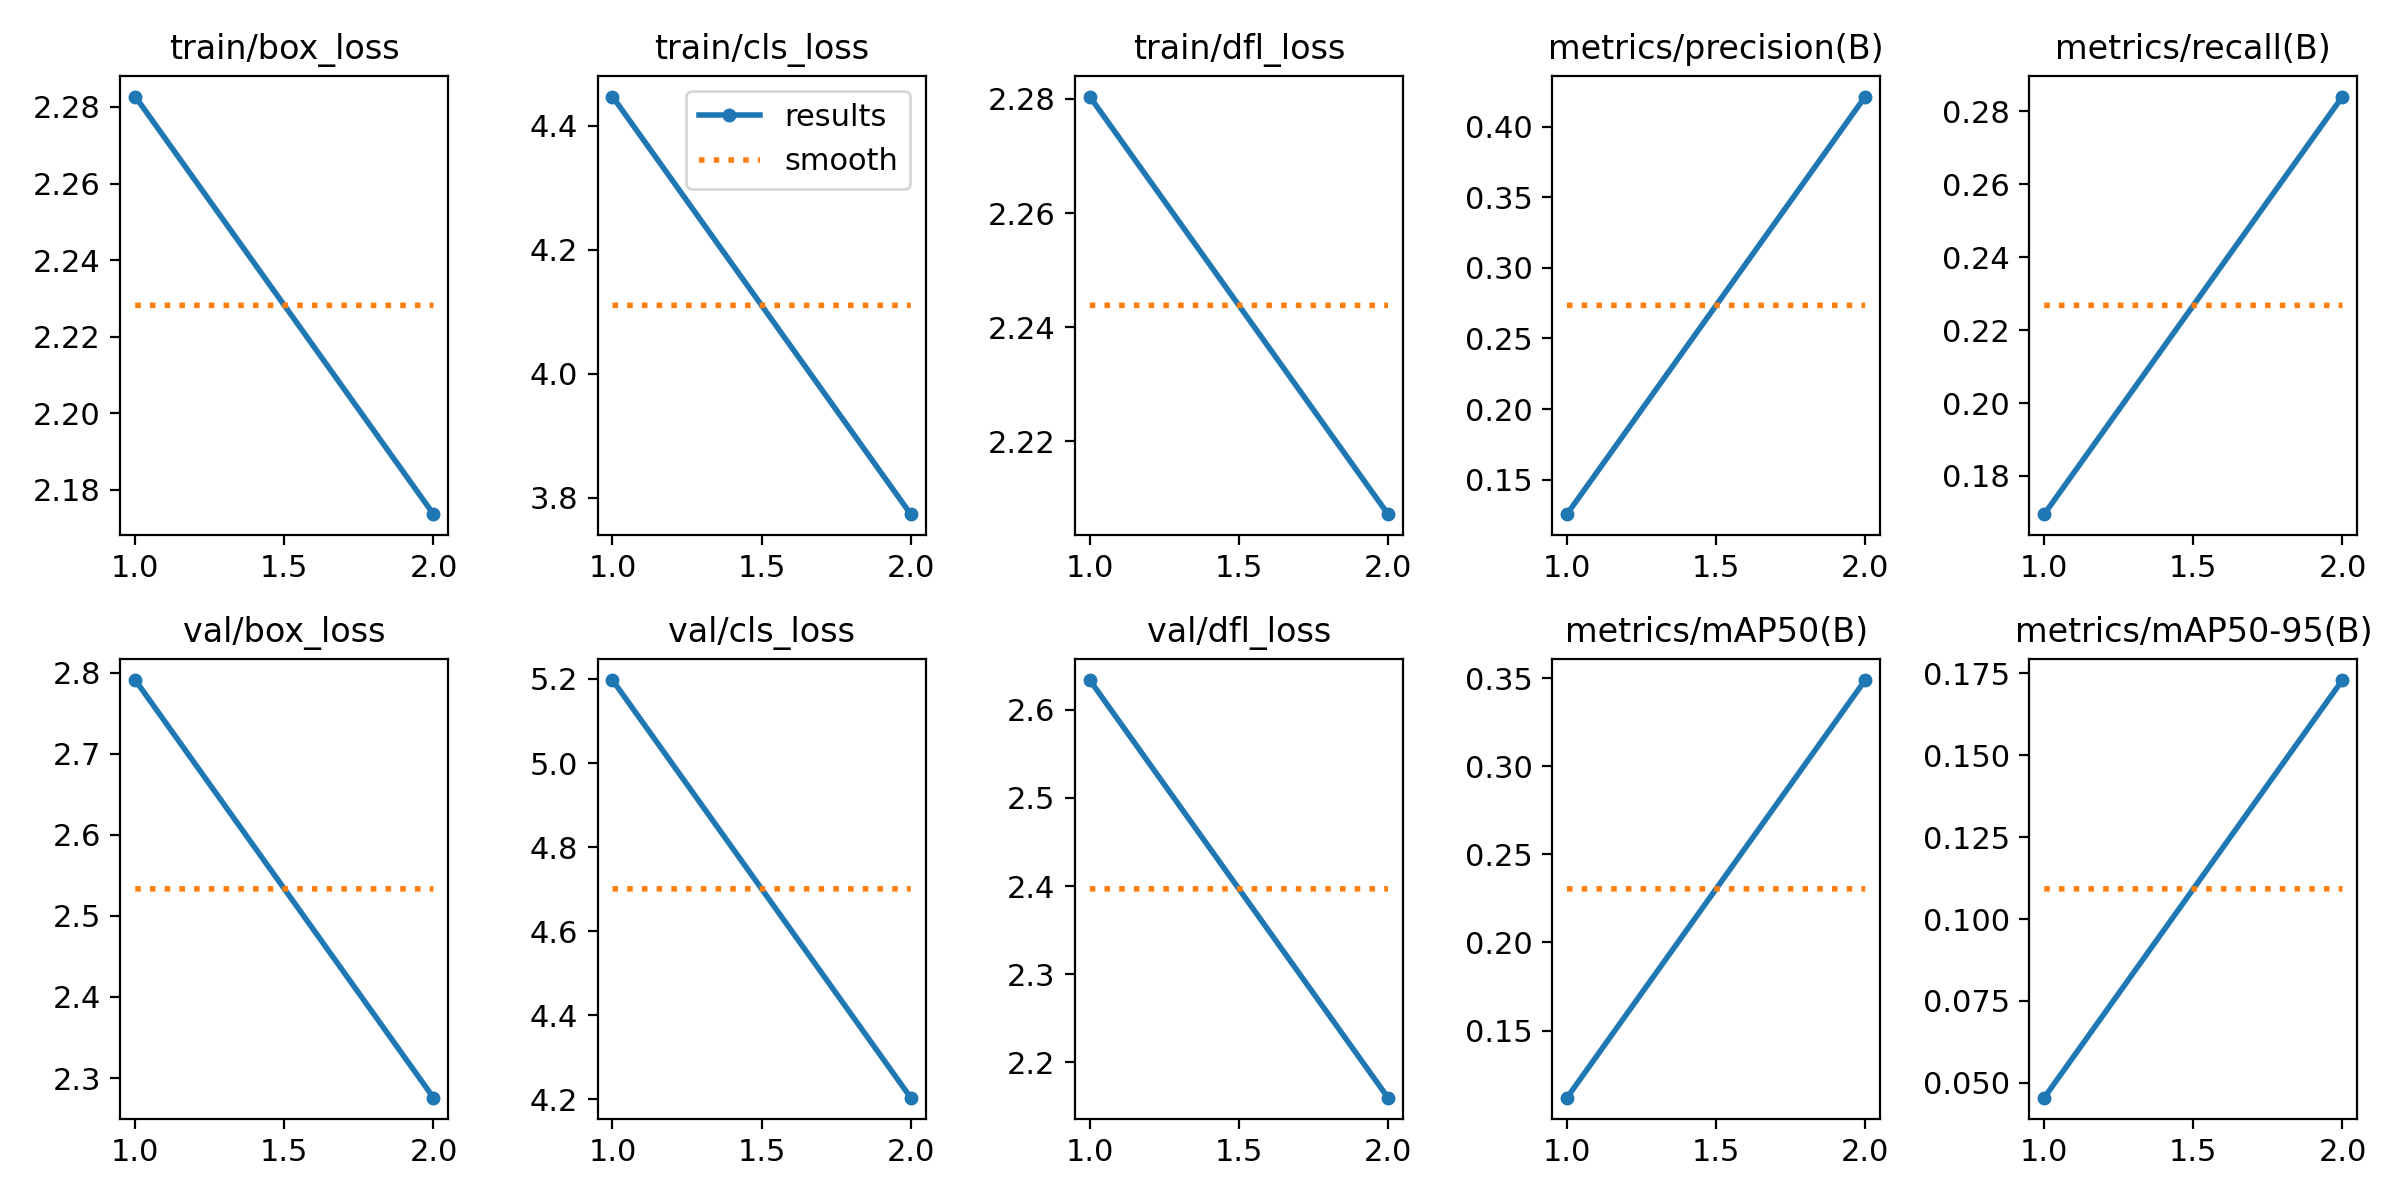

In [24]:
from IPython.display import Image

# Display results plot for YOLOv9 (as an example, you can change this)
Image(filename=f'/content/Benchmark_Visao/Run_YOLOv8/results.png', width=1000)

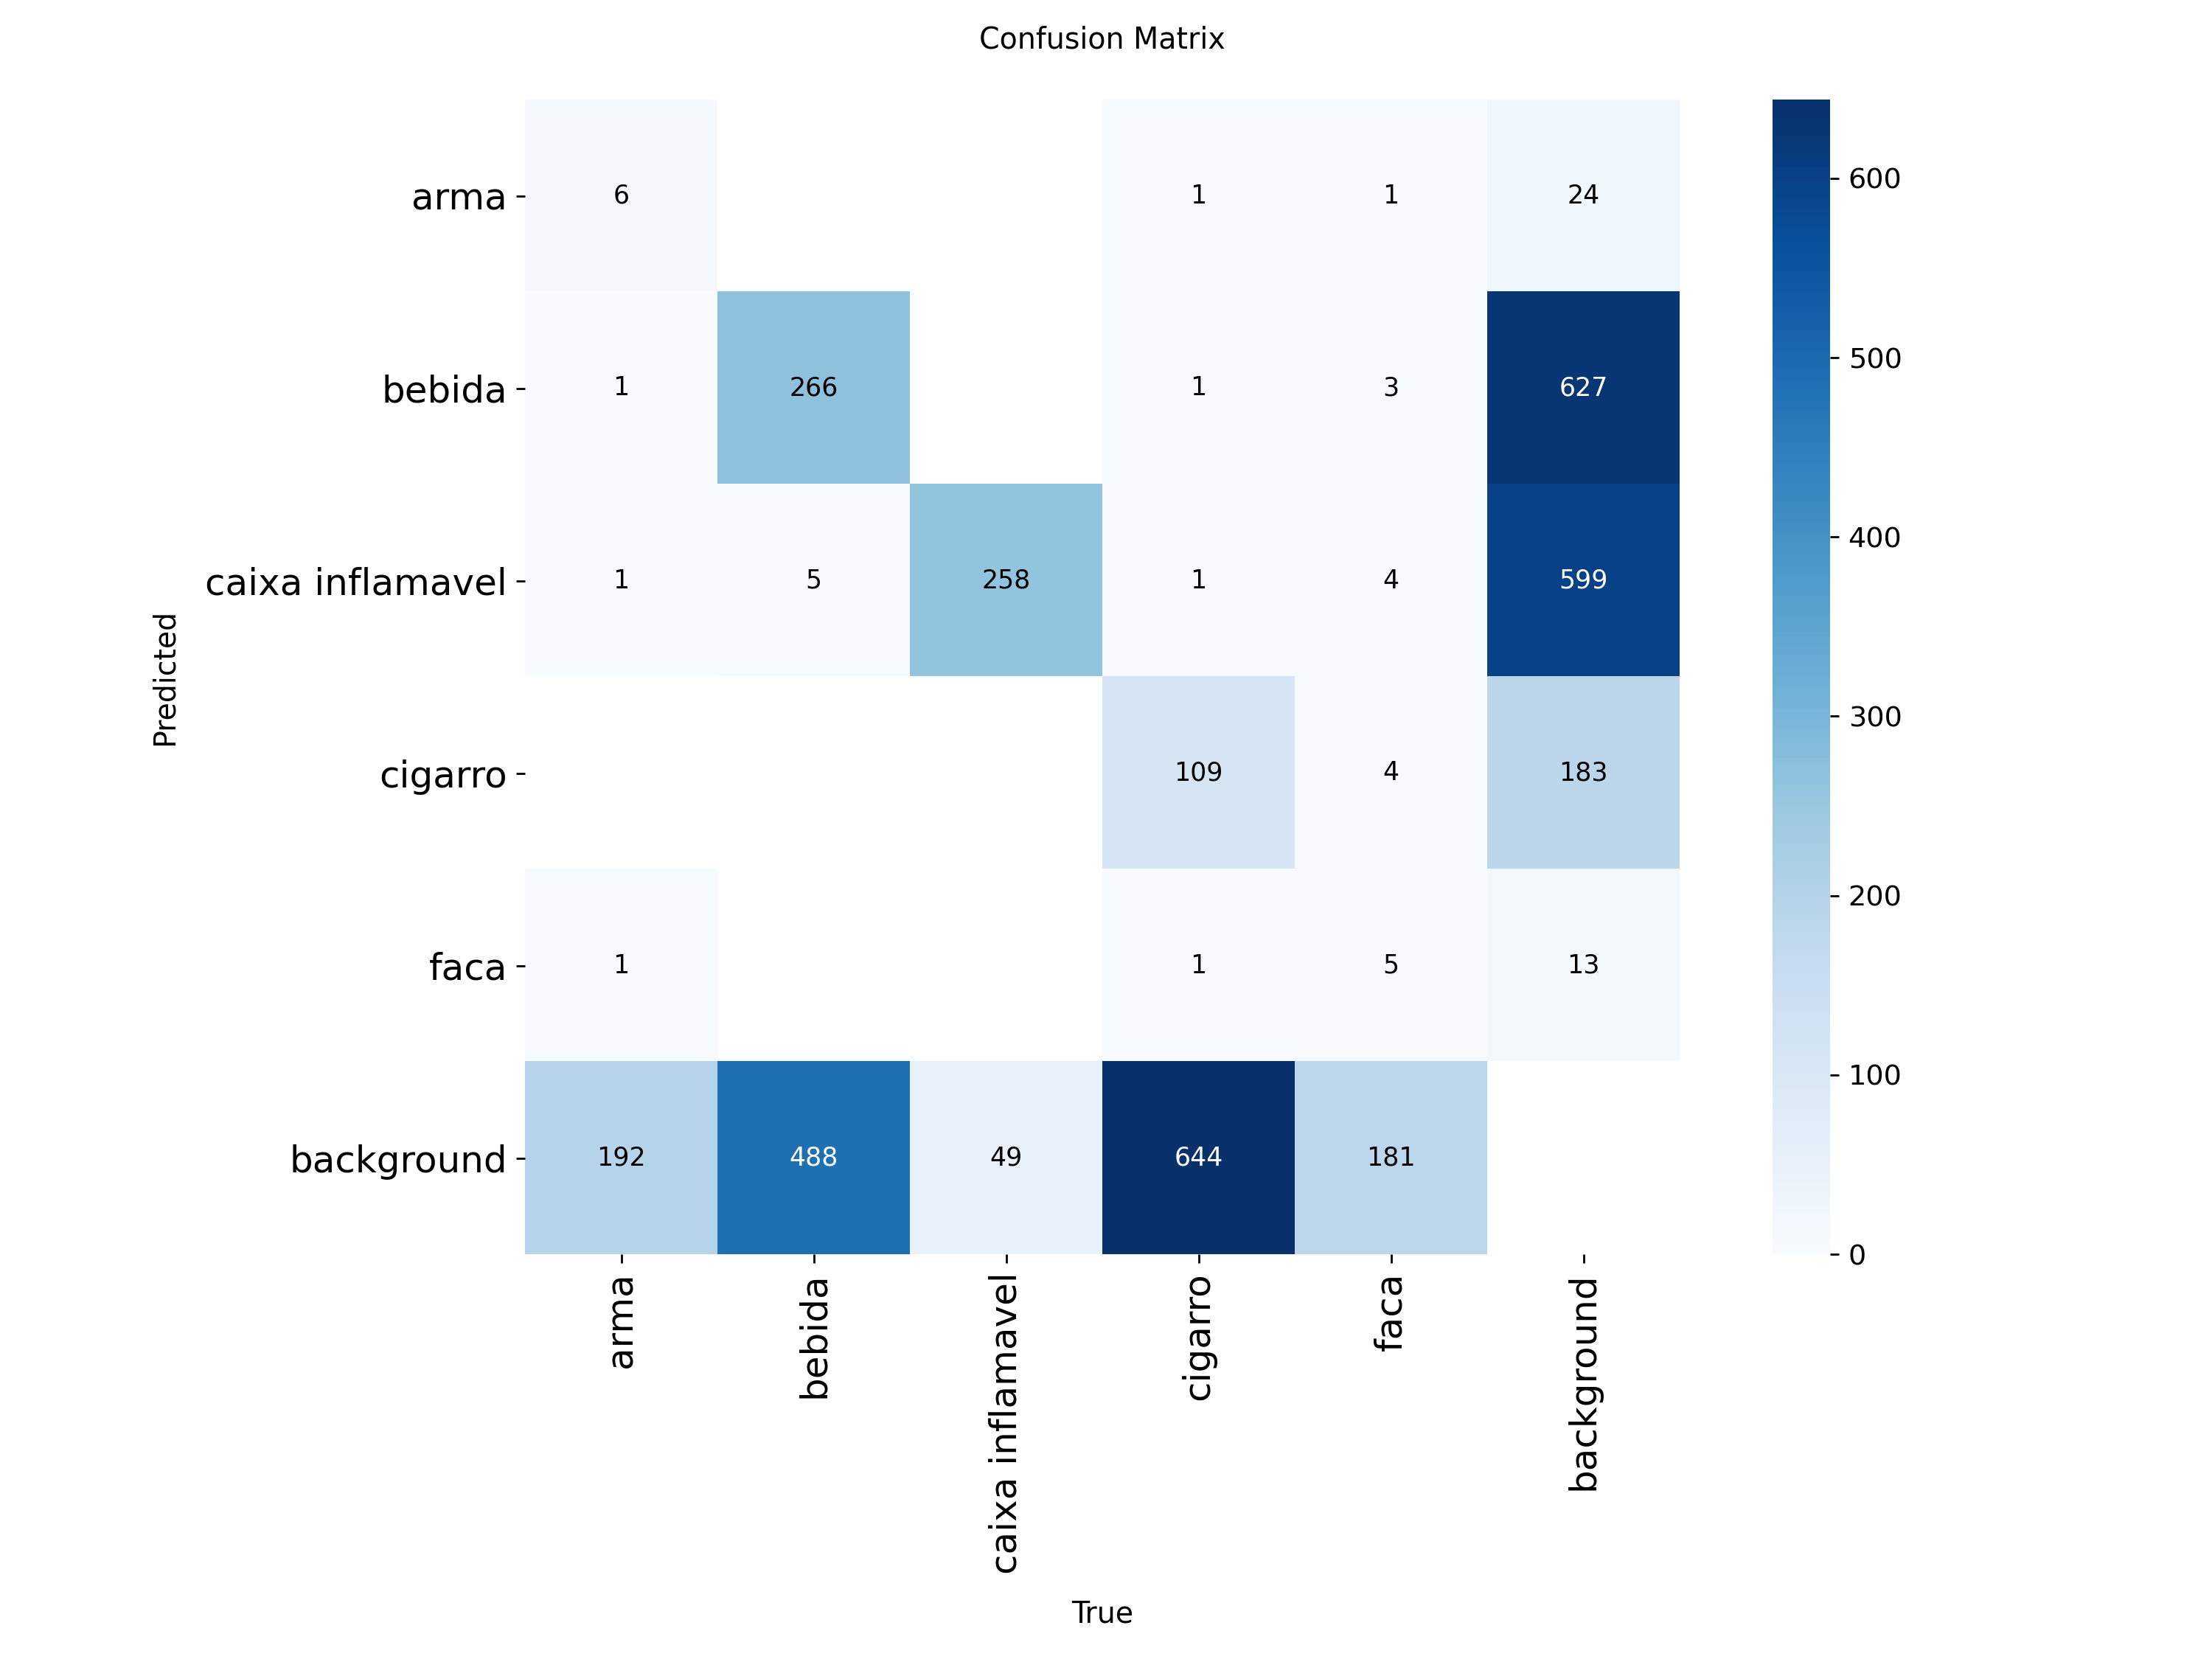

In [22]:
from IPython.display import Image

# Display confusion matrix for YOLOv9 (as an example, you can change this)
Image(filename=f'/content/Benchmark_Visao/Run_YOLOv9/confusion_matrix.png', width=1000)

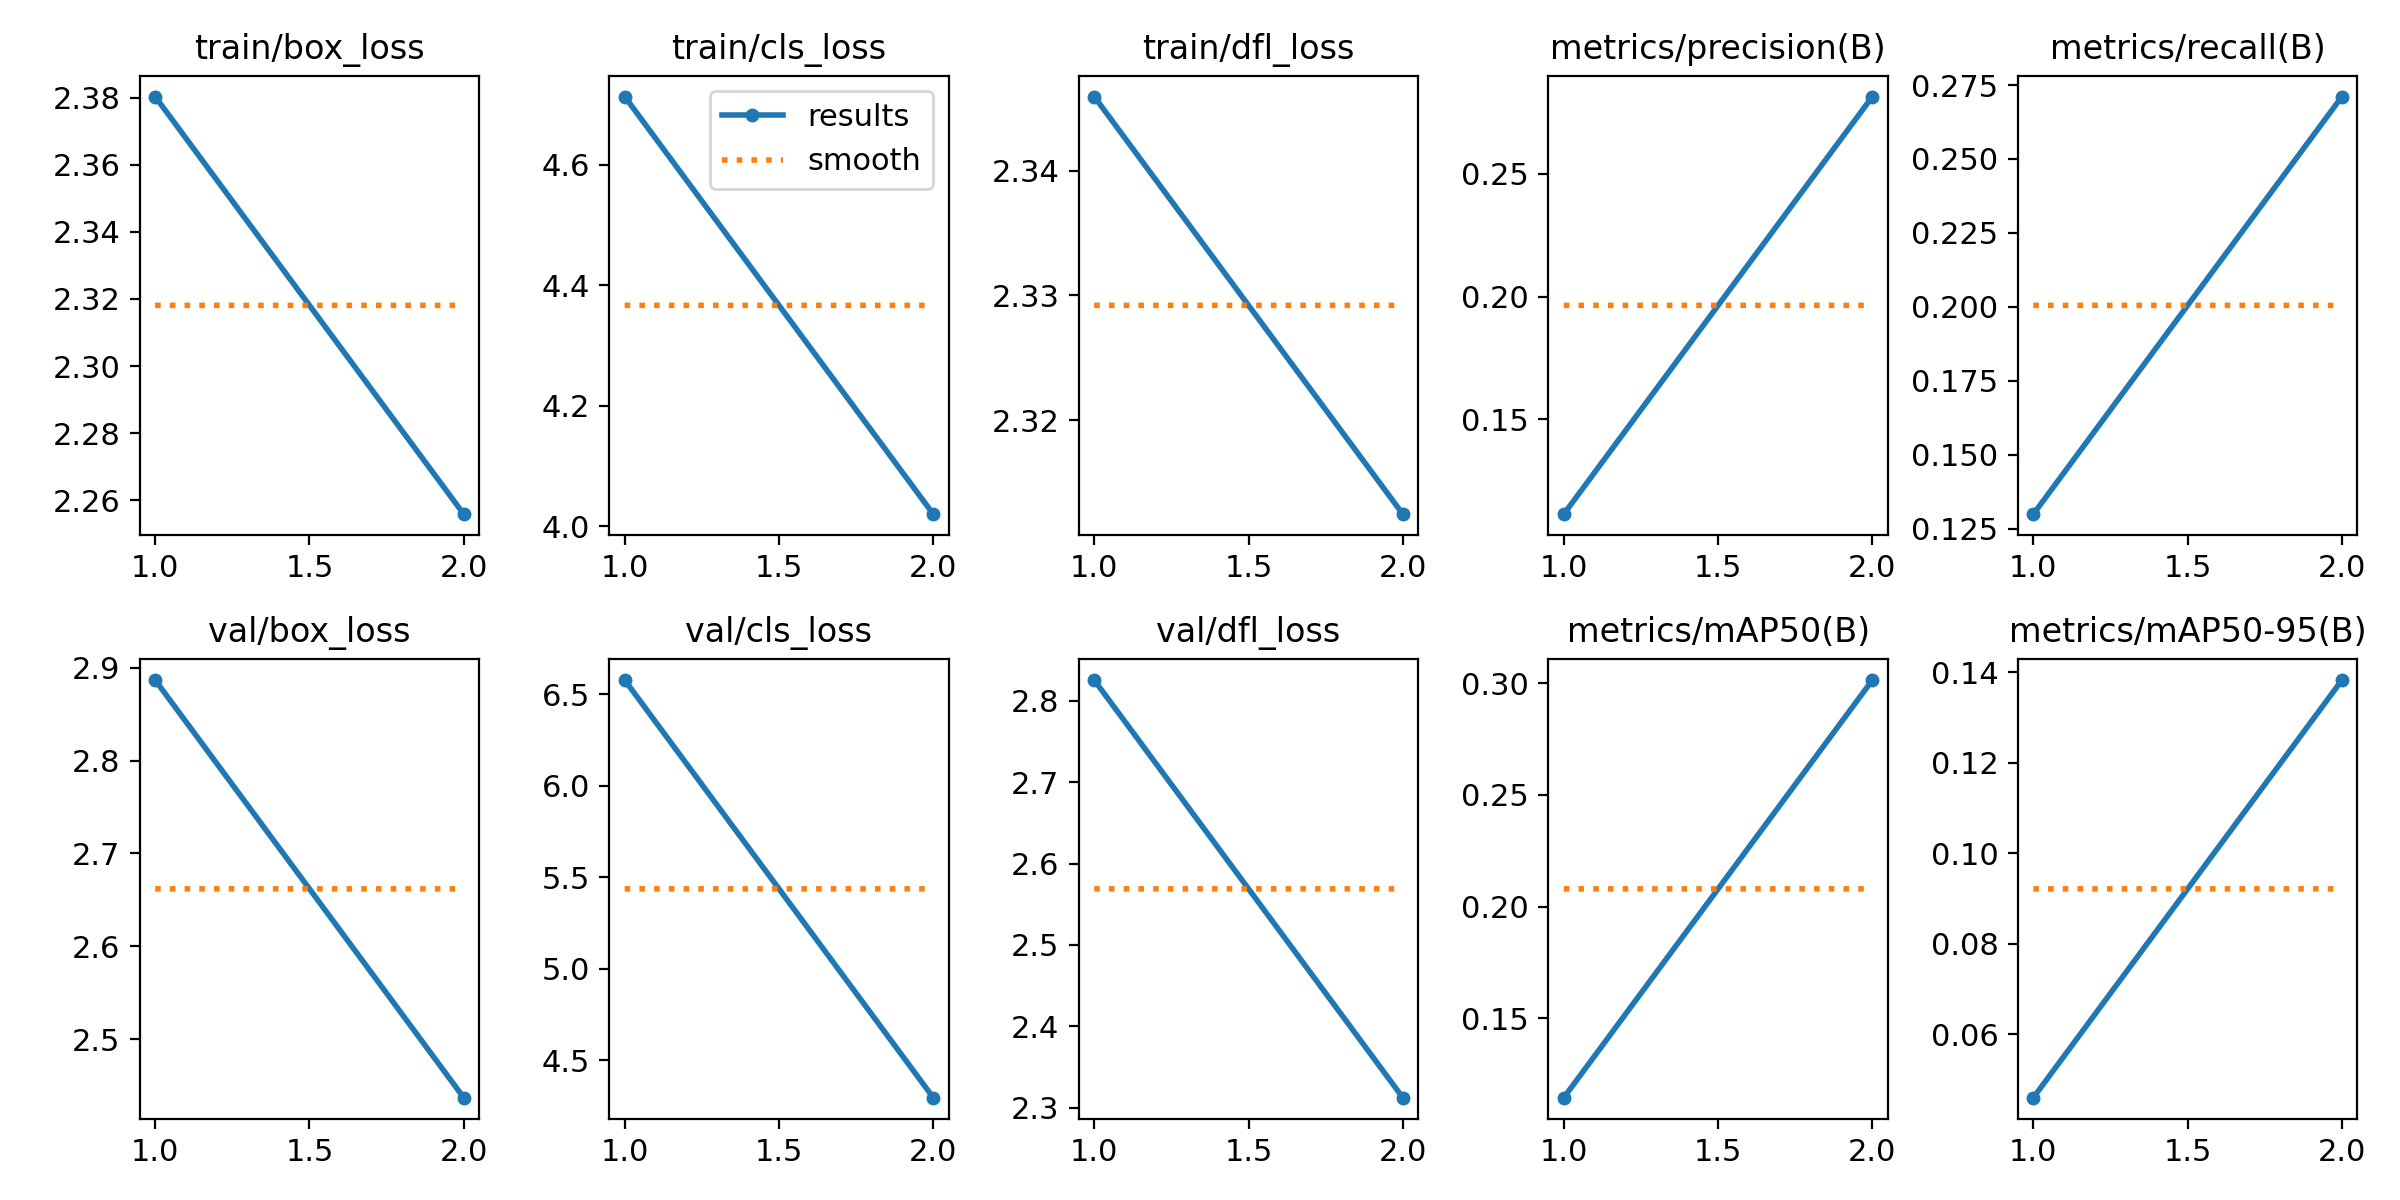

In [20]:
from IPython.display import Image

# Display results plot for YOLOv9 (as an example, you can change this)
Image(filename=f'/content/Benchmark_Visao/Run_YOLOv9/results.png', width=1000)

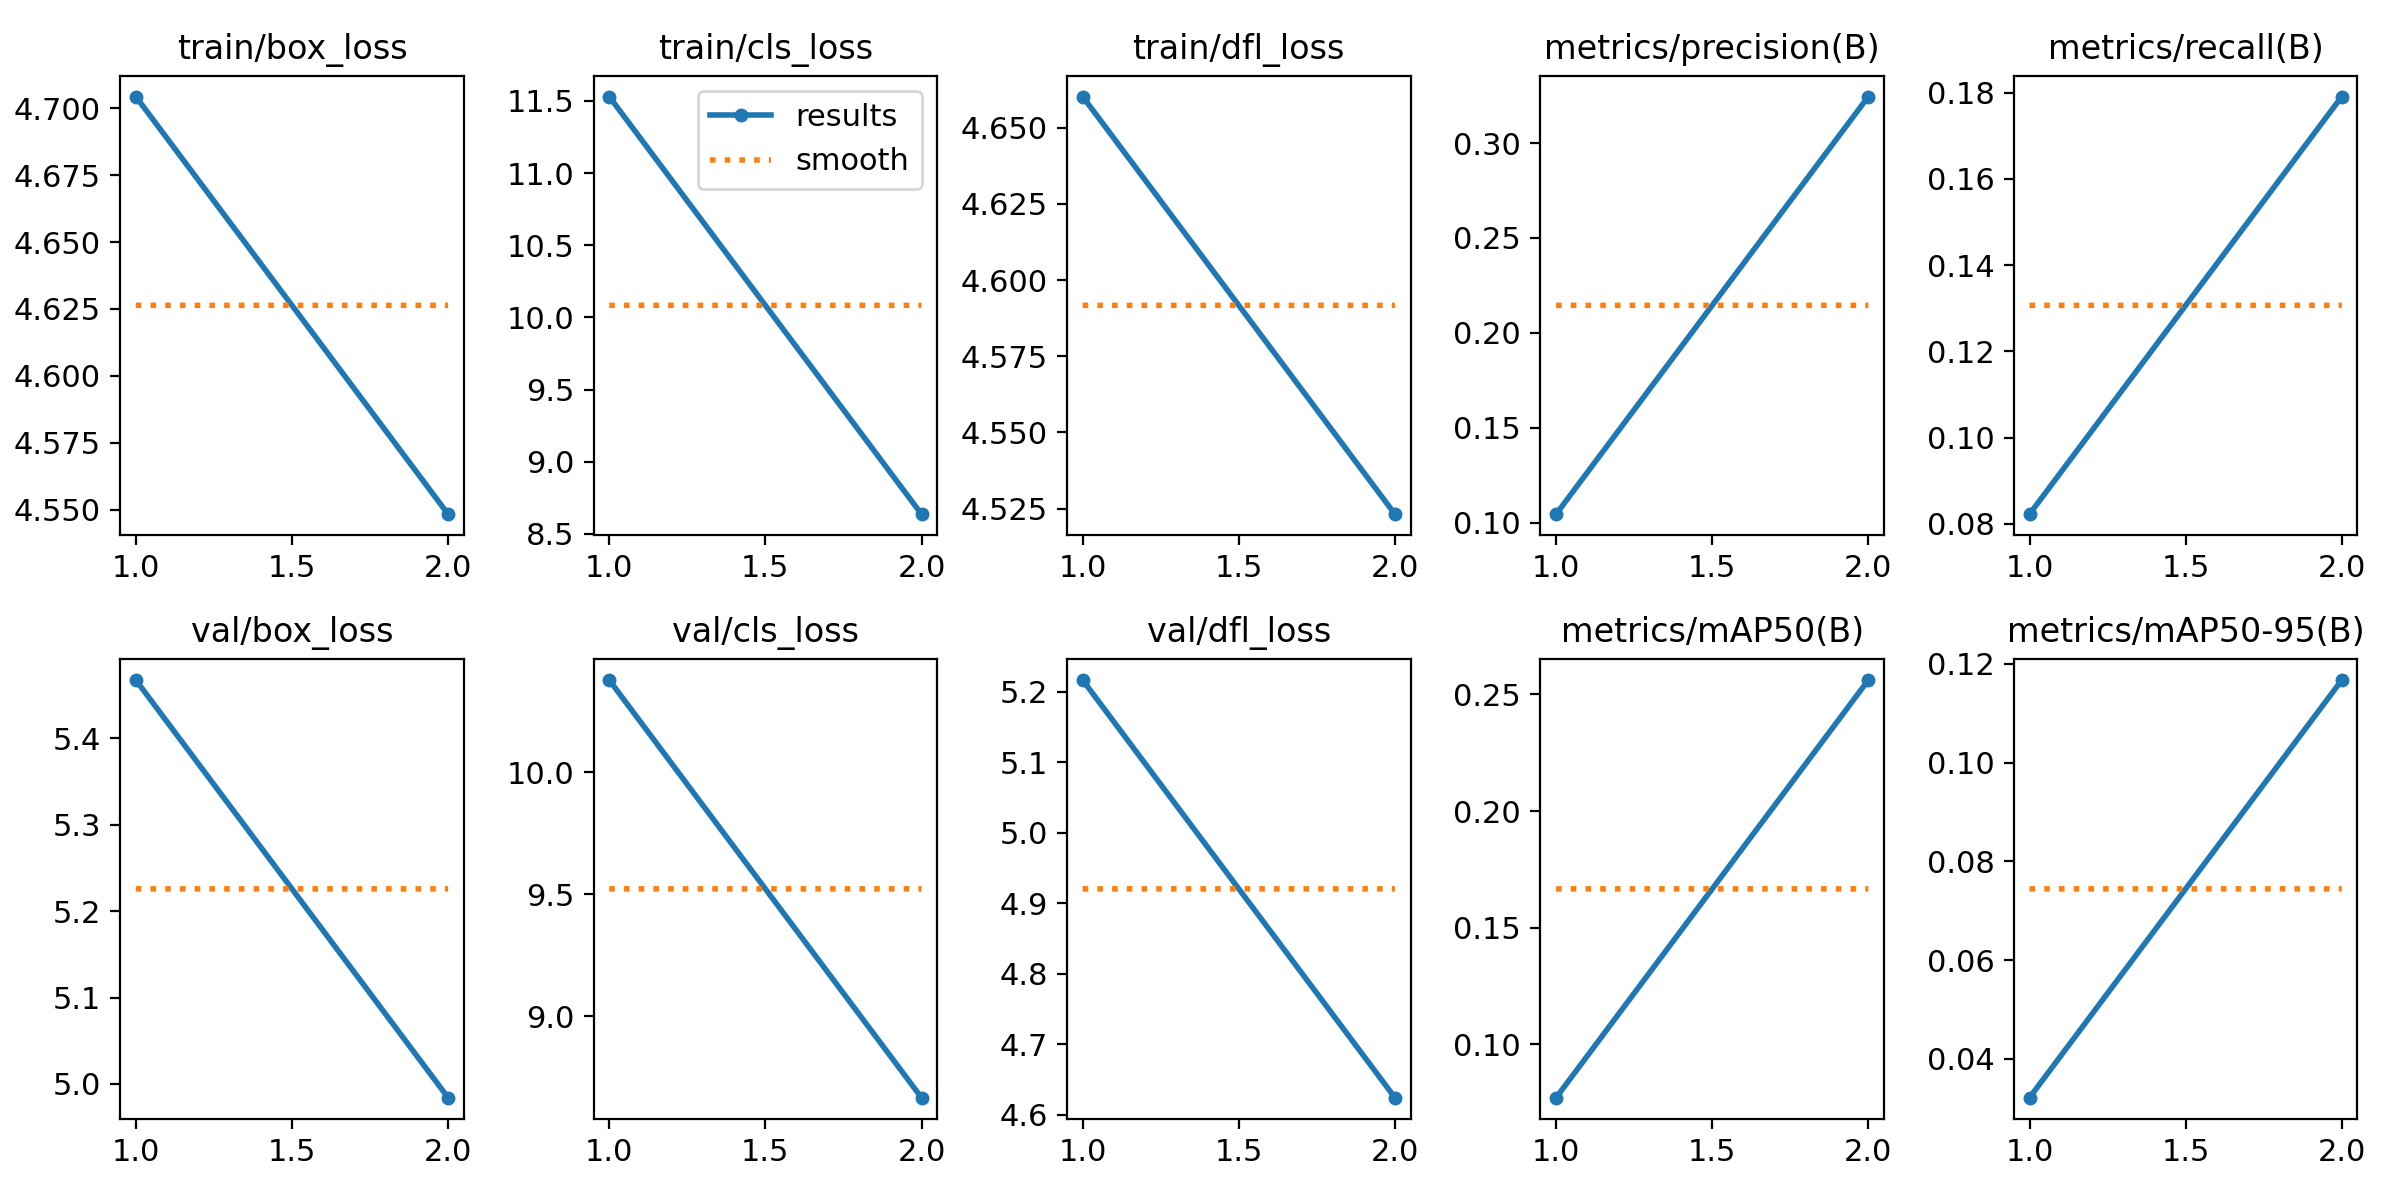

In [26]:
from IPython.display import Image

# Display confusion matrix for YOLOv9 (as an example, you can change this)
Image(filename=f'/content/Benchmark_Visao/Run_YOLOv10/results.png', width=1000)

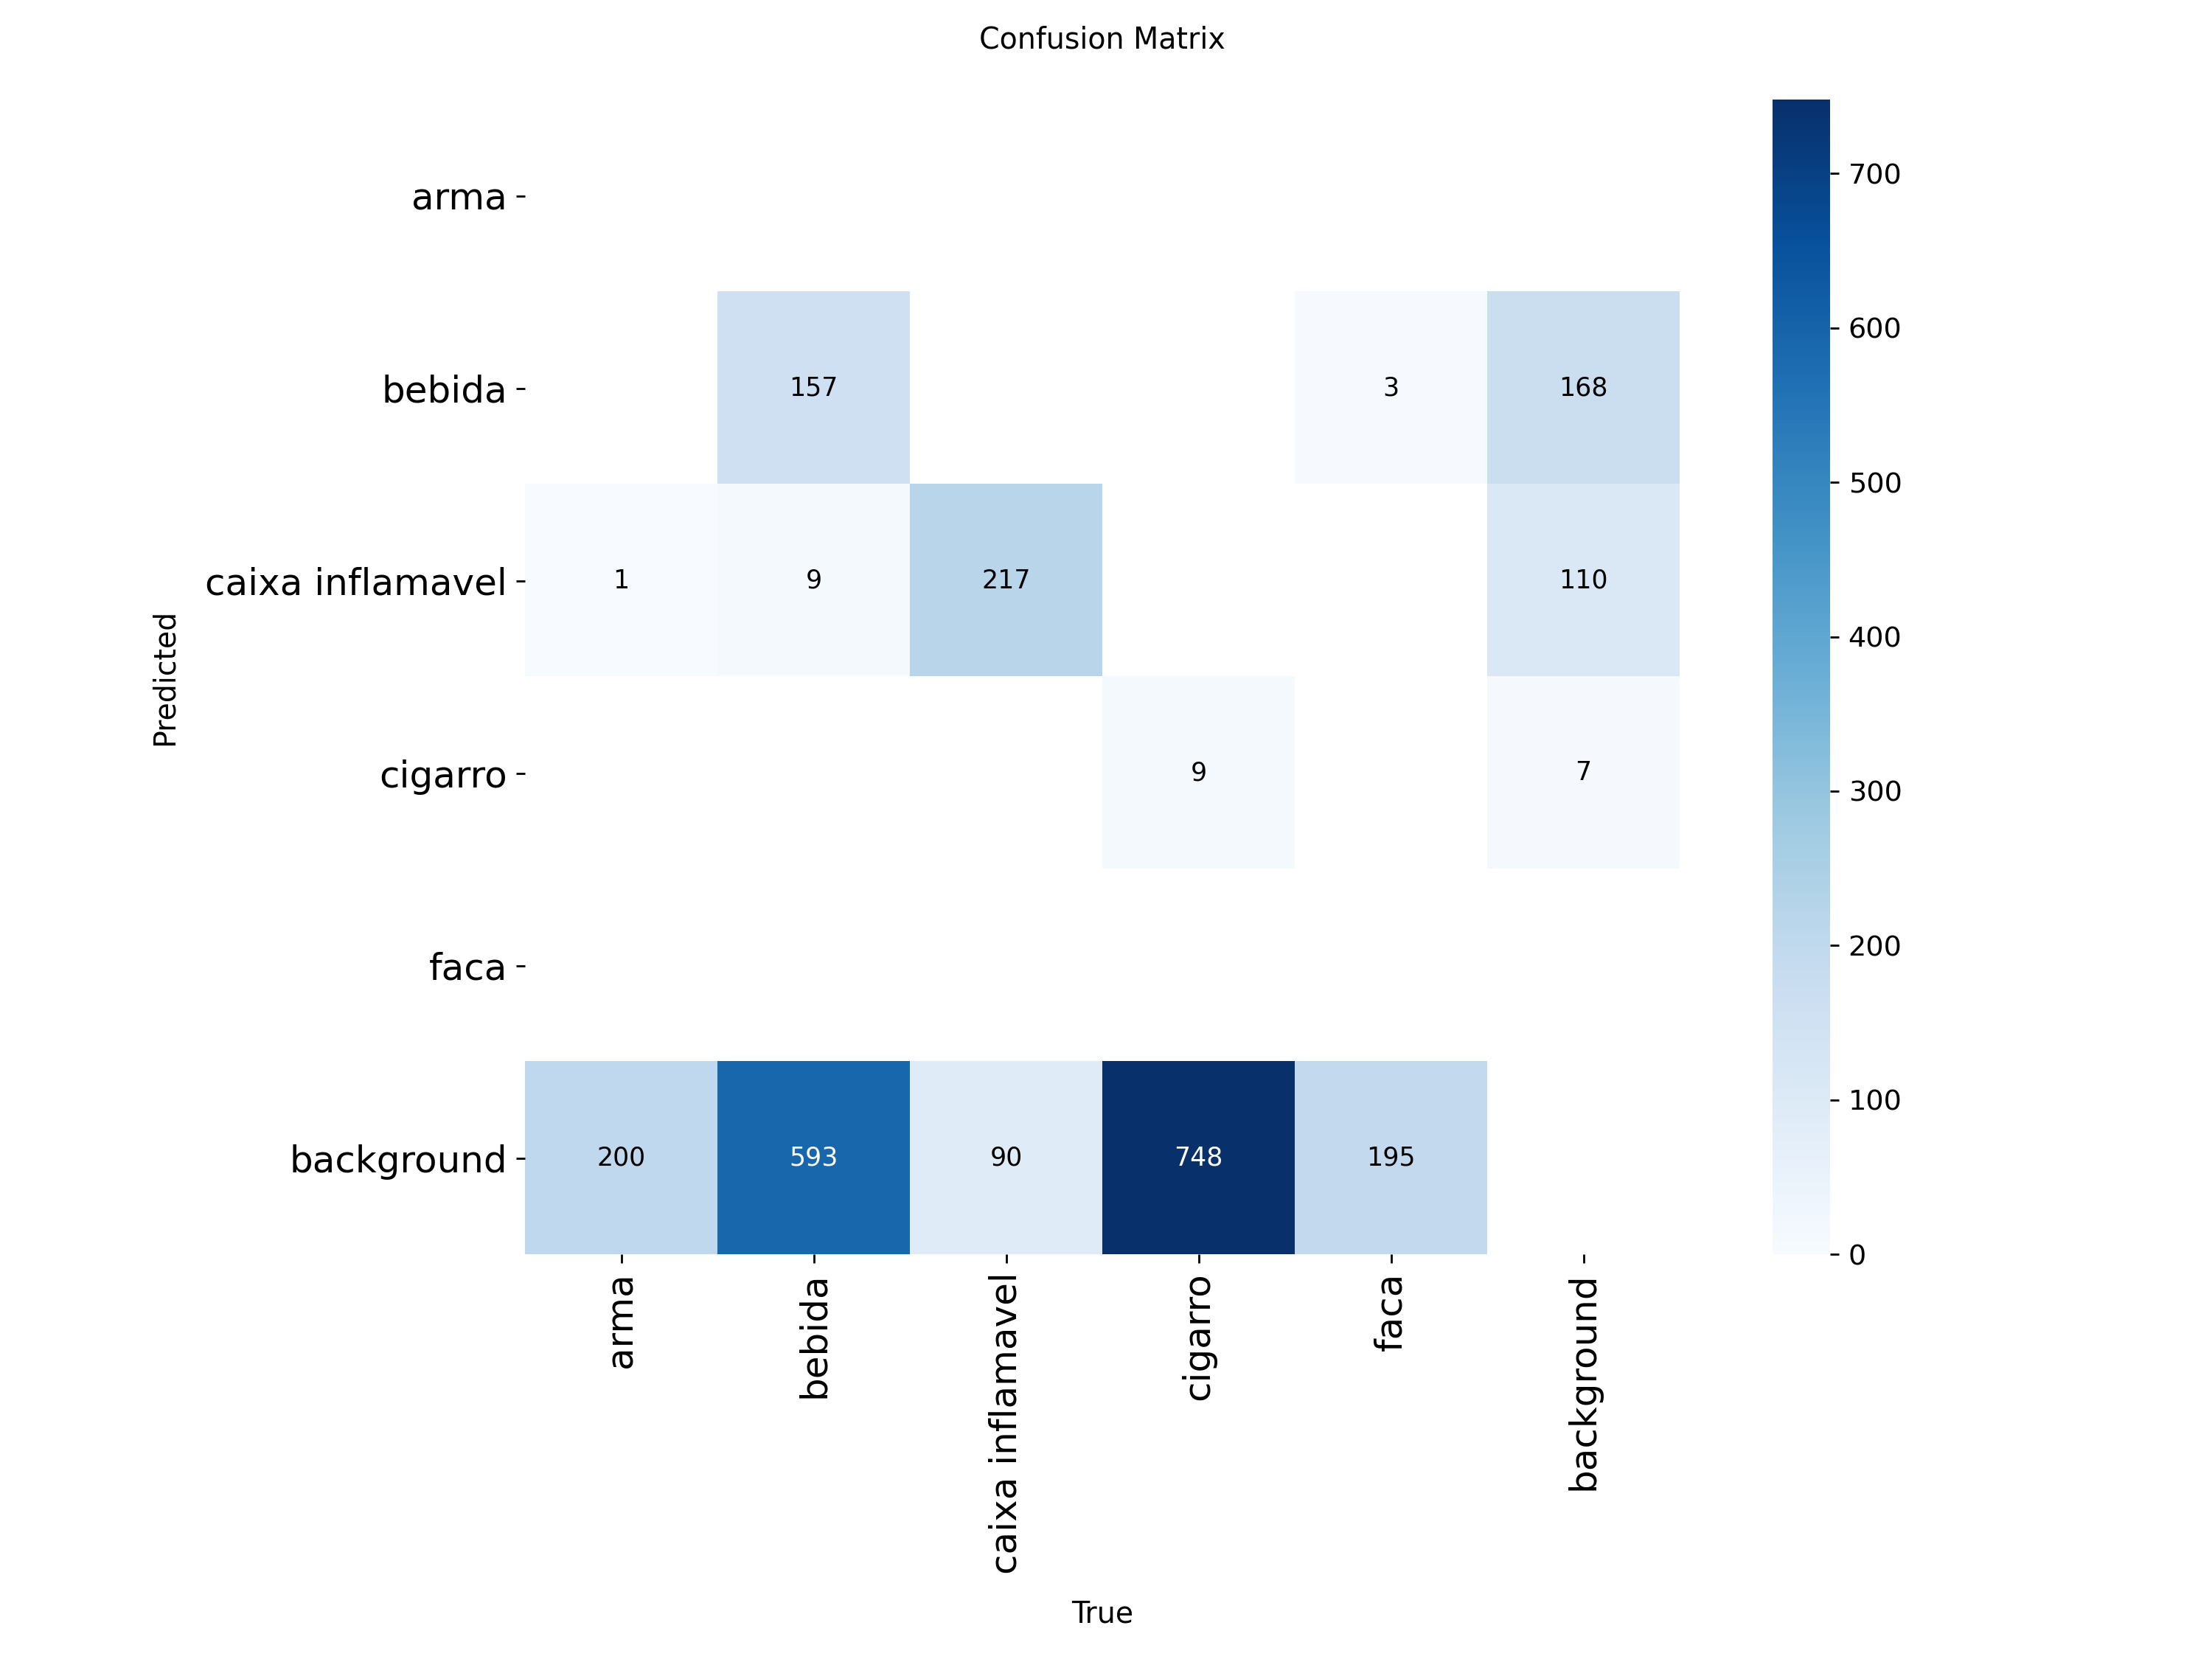

In [27]:
from IPython.display import Image

# Display results plot for YOLOv9 (as an example, you can change this)
Image(filename=f'/content/Benchmark_Visao/Run_YOLOv10/confusion_matrix.png', width=1000)

In [21]:
import supervision as sv
from ultralytics import YOLO
from supervision.metrics import MeanAveragePrecision

# Load the dataset for evaluation
ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

# Dictionary to store mAP results for each model
map_results = {}

# Evaluate YOLOv8
print("Evaluating YOLOv8...")
model_v8 = YOLO('/content/Benchmark_Visao/Run_YOLOv8/weights/best.pt')
predictions_v8 = []
targets_v8 = []
for _, image, target in ds:
    results = model_v8(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)
    predictions_v8.append(detections)
    targets_v8.append(target)
map_v8 = MeanAveragePrecision().update(predictions_v8, targets_v8).compute()
map_results['YOLOv8'] = map_v8

# Evaluate YOLOv9
print("Evaluating YOLOv9...")
model_v9 = YOLO('/content/Benchmark_Visao/Run_YOLOv9/weights/best.pt')
predictions_v9 = []
targets_v9 = []
for _, image, target in ds:
    results = model_v9(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)
    predictions_v9.append(detections)
    targets_v9.append(target)
map_v9 = MeanAveragePrecision().update(predictions_v9, targets_v9).compute()
map_results['YOLOv9'] = map_v9


# Evaluate YOLOv10
print("Evaluating YOLOv10...")
model_v10 = YOLO('/content/Benchmark_Visao/Run_YOLOv10/weights/best.pt')
predictions_v10 = []
targets_v10 = []
for _, image, target in ds:
    results = model_v10(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)
    predictions_v10.append(detections)
    targets_v10.append(target)
map_v10 = MeanAveragePrecision().update(predictions_v10, targets_v10).compute()
map_results['YOLOv10'] = map_v10

# Print mAP results for all models
print("\nmAP Results:")
for model_name, map_result in map_results.items():
    print(f"{model_name}:")
    print(f"  mAP 50:95: {map_result.map50_95}")
    print(f"  mAP 50: {map_result.map50}")
    print(f"  mAP 75: {map_result.map75}")

Evaluating YOLOv8...
Evaluating YOLOv9...
Evaluating YOLOv10...

mAP Results:
YOLOv8:
  mAP 50:95: 0.09344110264490949
  mAP 50: 0.19385380590486567
  mAP 75: 0.06754455450772076
YOLOv9:
  mAP 50:95: 0.09046956795380574
  mAP 50: 0.19873194511342623
  mAP 75: 0.05575690603367377
YOLOv10:
  mAP 50:95: 0.059010576149434515
  mAP 50: 0.12936532208620885
  mAP 75: 0.03985779685868012


## (opcional) Run inference with fine-tuned YOLOv9m model

In [ ]:
import supervision as sv

# model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')
model = YOLO(f'/{HOME}/models/100epochs+args.pt')


ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

In [ ]:
import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)